In [1]:
#steps in webscrapping:
#we use requests package to connect to the desired web page(status-200)
#we will use beautifulsoup libraray to parse the data from the webpage and store them in lists or dicts
#analysing the html tags from our specific fields
#store the data in the csv or xlsx files.

In [2]:
#HTTP response status codes:
#HTTP response status codes indicate whether a specific HTTP  request has been successfully completed.
#Responses are grouped in five classes:
#1.Informational responses(100-199)
#2.Successful responses(200-299)
#3.Redirection messages(300-399)
#4.Client error responses(400-499)
#5.Server error responses(500-599)

In [3]:
#pip install requests

In [4]:
#pip install bs4

In [5]:
import requests

In [6]:
import bs4

In [7]:
url="https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city"

In [8]:
data=requests.get(url)
data

<Response [200]>

In [9]:
data.text
type(data.text)

str

In [10]:
from bs4 import BeautifulSoup

In [11]:
soup=BeautifulSoup(data.text,"html")

In [12]:
soup.find('div',attrs={"class":"title-line"}).text

'3 BHK Apartment in Vedanta Towers'

In [13]:
soup.find('span',attrs={"itemprop":"addressLocality"}).text

'Gajulramaram Kukatpally'

In [14]:
soup.find('div',attrs={"data-type":"price-link"}).text

' 91.12 L'

In [15]:
soup.find('td',attrs={"class":"lbl rate"}).text

'5,917 / sq ft'

In [16]:
soup.find('td',attrs={"class":"size"}).text

'1540 '

In [17]:
soup.find('td',attrs={"class":"val"}).text

'Under Construction'

In [18]:
a=soup.find_all('div',attrs={"class":"title-line"})

In [19]:
prop=[i.text for i in a]
print(prop)
print(len(prop))

['3 BHK Apartment in Vedanta Towers', '5 BHK Villa in Green Mark Greenmark Mayfair Sunrise', '2 BHK Apartment in Akshita Heights 6', '3 BHK Apartment in Maram Mihira', '3 BHK Apartment in Gowra Urban Winds', '3 BHK Apartment in Adhireddy Pavan Kumar Reddy Cozy Essence Elite', '2 BHK Apartment in ASBL ASBL Springs', '3 BHK Apartment in Makuta Projects My Space 2', 'Residential Plot in Epitome Epitome Integrated City', '2 BHK Apartment in Vedanta Towers', '4 BHK Villa in Green Mark Greenmark Mayfair Sunrise', '2 BHK Apartment in Akshita Heights 6', '3 BHK Apartment in Maram Mihira', '4 BHK Apartment in Gowra Urban Winds', '2 BHK Apartment in Adhireddy Pavan Kumar Reddy Cozy Essence Elite', '2 BHK Apartment in ASBL ASBL Springs', '2 BHK Apartment in Makuta Projects My Space 2', 'Residential Plot in Epitome Epitome Integrated City', '2 BHK Apartment in Vedanta Towers', '4 BHK Villa in Green Mark Greenmark Mayfair Sunrise']
20


In [21]:
b=soup.find_all('span',attrs={"itemprop":"addressLocality"})

In [22]:
location=[i.text for i in b]
print(location)
print(len(location))

['Gajulramaram Kukatpally', 'Velmala', 'Malkajgiri', 'Pocharam', 'Kismatpur', 'Kompally', 'Pocharam', 'Bachupally', 'Choutuppal', 'Gajulramaram Kukatpally', 'Velmala', 'Malkajgiri', 'Pocharam', 'Kismatpur', 'Kompally', 'Pocharam', 'Bachupally', 'Choutuppal', 'Gajulramaram Kukatpally', 'Velmala']
20


In [23]:
c=soup.find_all('div',attrs={"data-type":"price-link"})

In [24]:
price=[i.text for i in c]
print(price)
print(len(price))

[' 91.12 L', ' 6.81 Cr', ' 81.51 L', ' 1.17 Cr', ' 96.3 L', ' 90.22 L', ' 60.48 L', ' 1.26 Cr', ' 48.99 L', ' 71.29 L', ' 4.7 Cr', ' 73.14 L', ' 1.16 Cr', ' 1.12 Cr', ' 66.82 L', ' 60.48 L', ' 89.7 L', ' 97.81 L', ' 68.04 L', ' 4.33 Cr']
20


In [25]:
d=soup.find_all('td',attrs={"class":"lbl rate"})

In [26]:
measure=[i.text for i in d]
print(measure)
print(len(measure))

['5,917 / sq ft', '11,143 / sq ft', '6,199 / sq ft', '5,055 / sq ft', '6,399 / sq ft', '4,500 / sq ft', '4,999 / sq ft', '6,502 / sq ft', '2,039 / sq ft', '5,917 / sq ft', '11,132 / sq ft', '6,199 / sq ft', '5,055 / sq ft', '6,399 / sq ft', '4,500 / sq ft', '4,999 / sq ft', '6,500 / sq ft', '2,039 / sq ft', '5,917 / sq ft', '11,136 / sq ft']
20


In [27]:
e=soup.find_all('td',attrs={"class":"size"})

In [28]:
size=[i.text for i in e]
print(size)
print(len(size))

['1540 ', '6111 ', '1315 ', '2315 ', '1505 ', '2005 ', '1210 ', '1946 ', '2403 ', '1205 ', '4222 ', '1180 ', '2314 ', '1760 ', '1485 ', '1210 ', '1380 ', '4797 ', '1150 ', '3888 ']
20


In [29]:
f=soup.find_all('td',attrs={"class":"val"})

In [30]:
status=[i.text for i in f]
print(status)
print(len(status))

['Under Construction', 'Under Construction', 'Under Construction', 'Under Construction', 'Ready to move', 'Ready to move', 'Under Construction', 'Under Construction', 'New', 'Under Construction', 'Under Construction', 'Under Construction', 'Under Construction', 'Ready to move', 'Ready to move', 'Under Construction', 'Under Construction', 'New', 'Under Construction', 'Under Construction']
20


In [31]:
import pandas as pd

In [32]:
data=pd.DataFrame({"prop":prop,"location":location,"price":price,"size":size,"measure":measure,"status":status})
data

,prop,location,price,size,measure,status
0,3 BHK Apartment in Vedanta Towers,Gajulramaram Kukatpally,91.12 L,1540,"5,917 / sq ft",Under Construction
1,5 BHK Villa in Green Mark Greenmark Mayfair Su...,Velmala,6.81 Cr,6111,"11,143 / sq ft",Under Construction
2,2 BHK Apartment in Akshita Heights 6,Malkajgiri,81.51 L,1315,"6,199 / sq ft",Under Construction
3,3 BHK Apartment in Maram Mihira,Pocharam,1.17 Cr,2315,"5,055 / sq ft",Under Construction
4,3 BHK Apartment in Gowra Urban Winds,Kismatpur,96.3 L,1505,"6,399 / sq ft",Ready to move
5,3 BHK Apartment in Adhireddy Pavan Kumar Reddy...,Kompally,90.22 L,2005,"4,500 / sq ft",Ready to move
6,2 BHK Apartment in ASBL ASBL Springs,Pocharam,60.48 L,1210,"4,999 / sq ft",Under Construction
7,3 BHK Apartment in Makuta Projects My Space 2,Bachupally,1.26 Cr,1946,"6,502 / sq ft",Under Construction
8,Residential Plot in Epitome Epitome Integrated...,Choutuppal,48.99 L,2403,"2,039 / sq ft",New
9,2 BHK Apartment in Vedanta Towers,Gajulramaram Kukatpally,71.29 L,1205,"5,917 / sq ft",Under Construction


In [33]:
data.to_csv("Hyd_Apartments.csv")

In [34]:
base_url="https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page="
for i in range(19):
    print(base_url+str(i))

https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=0
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=1
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=2
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=3
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=4
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=5
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=6
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=7
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=8
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-city?page=9
https://www.makaan.com/hyderabad-residential-property/buy-property-in-hyderabad-

In [35]:
import matplotlib.pyplot as plt

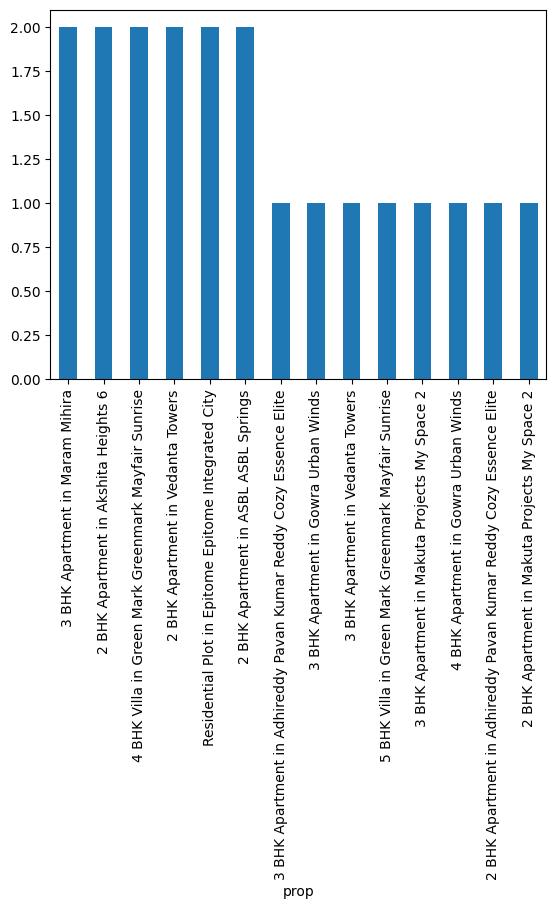

In [44]:
data["prop"].value_counts().plot(kind="bar")
plt.show()

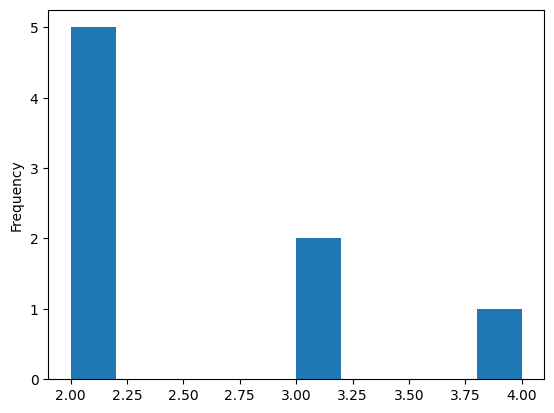

In [45]:
data["location"].value_counts().plot(kind="hist")
plt.show()

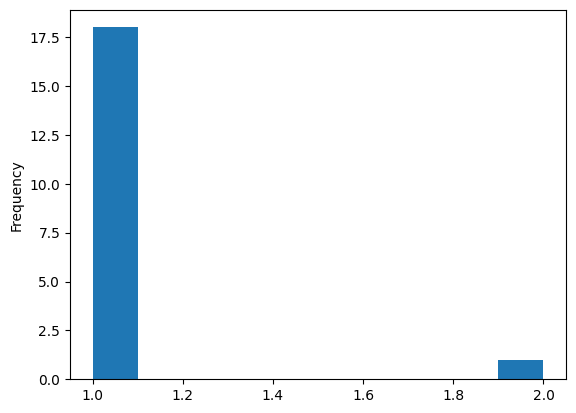

In [46]:
data["price"].value_counts().plot(kind="hist")
plt.show()

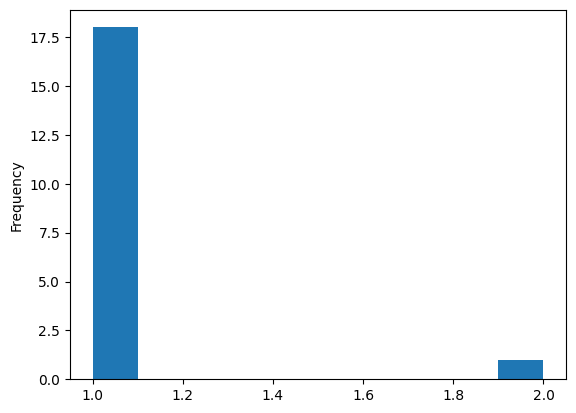

In [47]:
data["size"].value_counts().plot(kind="hist")
plt.show()

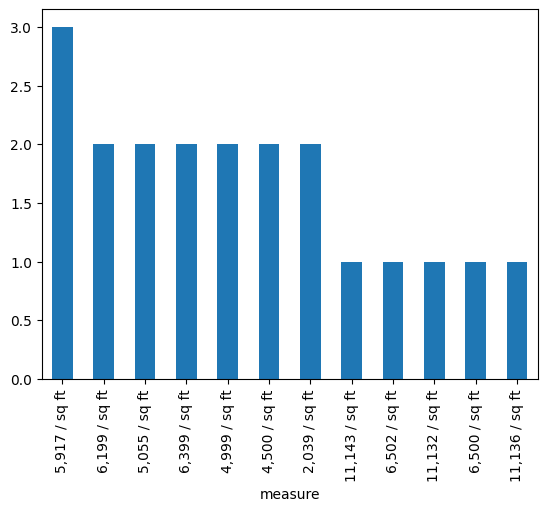

In [48]:
data["measure"].value_counts().plot(kind="bar")
plt.show()

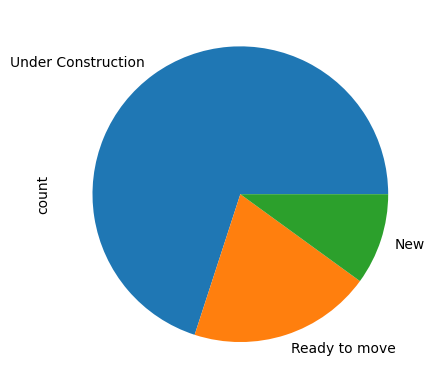

In [49]:
data["status"].value_counts().plot(kind="pie")
plt.show()